In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=.8)

In [36]:
beers = pd.read_csv('../raw/beers.csv')


## BeerAdvocate Beers
- Data Cleaning
- #samples
- #features
- univariate analysis

## Data Cleaning Check

We see that nearly in each datarow there are numerical rating values missing for the beer entries.
Hence, those values should not be considered in the beer review analysis.

In [43]:
# Check for empty values in each column
empty_values = beers.isna()

# Display columns with empty values
print("Columns with Empty Values:")
print(empty_values[empty_values.any(axis=1)])

Columns with Empty Values:
        beer_id  beer_name  brewery_id  brewery_name  style  nbr_ratings  \
0         False      False       False         False  False        False   
1         False      False       False         False  False        False   
2         False      False       False         False  False        False   
3         False      False       False         False  False        False   
4         False      False       False         False  False        False   
...         ...        ...         ...           ...    ...          ...   
280818    False      False       False         False  False        False   
280819    False      False       False         False  False        False   
280820    False      False       False         False  False        False   
280821    False      False       False         False  False        False   
280822    False      False       False         False  False        False   

        nbr_reviews    avg  ba_score  bros_score    abv  avg

KeyError: 'beer_sort'

Count distinct beer sorts and display how many beer sorts each brewery has.


In [47]:
distinct_beer_sorts = beers['beer_id'].nunique()
print(f"Number of distinct beer sorts: {distinct_beer_sorts}")

beers_per_brewery = beers['brewery_id'].value_counts()
print("\nNumber of beers per brewery:")
print(beers_per_brewery)


Number of distinct beer sorts: 280823

Number of beers per brewery:
1550     1196
17981     981
28383     975
1146      869
13307     795
         ... 
45176       1
46793       1
45924       1
34670       1
4869        1
Name: brewery_id, Length: 14325, dtype: int64

Number of beers per brewery:


KeyError: "None of [Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\n            ...\n            2, 3, 0, 2, 3, 3, 2, 0, 0, 0],\n           dtype='int64', length=280823)] are in the [columns]"

## Basic Beers Dataset stats

In [37]:
print(beers.shape)
print()
print(beers.columns)
print()
print(beers.info())


## Univariate Analysis

Number of ratings

<AxesSubplot:xlabel='beer_id', ylabel='nbr_ratings'>

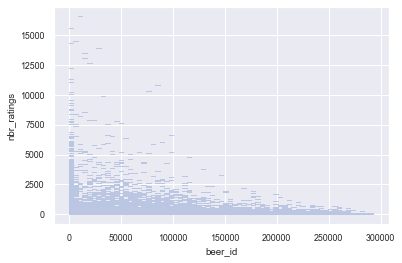

In [51]:
sns.histplot(x='beer_id', y='nbr_ratings', data=beers)

Number of beers from a specific style

/var/folders/pb/_c880hn97bl31ptprw36704w0000gn/T/ipykernel_58444/310078474.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='style', data=beers, palette='viridis', edgecolor='black')


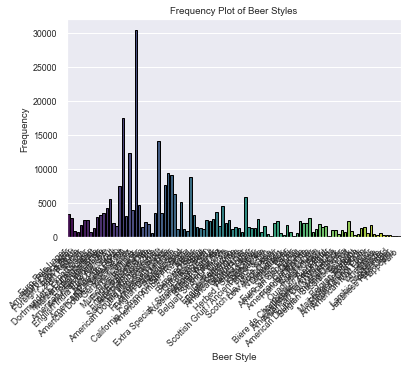

In [38]:
sns.countplot(x='style', data=beers, palette='viridis', edgecolor='black')
plt.title('Frequency Plot of Beer Styles')
plt.xlabel('Beer Style')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
total_beer_nrev = beers['nbr_reviews'].sum()
beers['% of total'] = round(100*(beers['nbr_reviews'] / total_beer_nrev),4)
beers.sort_values('% of total', ascending=False)[['brewery_name', 'beer_name', '% of total']].iloc[:10]
